<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

) Найдем производную $\nabla_w Q(w)$:

$Q(w) = (y - xw)^T(y - xw) + \lambda w^2$

Раскроем скобки:

$Q(w) = y^Ty - y^Txw - (xw)^Ty + (xw)^T(xw) + \lambda w^2$

$Q(w) = y^Ty - 2y^Txw + w^Tx^Txw + \lambda w^2$

Производная:

$\nabla_w Q(w) = -2x^Ty + 2x^Txw + 2\lambda w$

Приравняем к нулю для поиска оптимального $w$:

$-2x^Ty + 2x^Txw + 2\lambda w = 0$

$2(x^Tx + \lambda)w = 2x^Ty$

Оптимальное значение:

$w = \frac{x^Ty}{x^Tx + \lambda}$

2) Найдем вторую производную:

$\nabla^2_w Q(w) = 2x^Tx + 2\lambda$

Так как $x^Tx$ и $\lambda$ положительны ($\lambda > 0$ по условию),
то вторая производная всегда $> 0$.

Следовательно, мы находимся в точке минимума.

3) Шаг градиентного спуска:

$w_{k+1} = w_k - \alpha\nabla_w Q(w_k)$

$w_{k+1} = w_k - \alpha(-2x^Ty + 2x^Txw_k + 2\lambda w_k)$

$w_{k+1} = w_k + 2\alpha(x^Ty - (x^Tx + \lambda)w_k)$

где $\alpha$ - learning rate

В матричном виде:

$w_{k+1} = w_k + 2\alpha(X^T y - (X^T X + \lambda I)w_k)$

где $I$ - единичная матрица соответствующей размерности.

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [2]:
import numpy as np

def f(x):

  return x * np.sin(5*x) + 0.1 * x**2

def df(x):

    return np.sin(5*x) + 5*x*np.cos(5*x) + 0.2*x

def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    path = [x0]

    for i in range(max_iter):
        grad = df(x)
        x_new = x - eta * grad

        if abs(x_new - x) < tol:
            break

        x = x_new
        path.append(x)

    return x, np.array(path)

def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):

    x_min, path_min = gradient_descent(f, df, x0, eta, max_iter, tol)

    x_max, path_max = gradient_descent(lambda x: -f(x),
                                     lambda x: -df(x),
                                     x0, eta, max_iter, tol)

    return x_min, f(x_min), x_max, f(x_max), path_min, path_max

In [8]:

x0_points = [0, 0.5, 1]

for x0 in x0_points:
    x_min, f_min, x_max, f_max, path_min, path_max = find_points(f, df, x0, eta=0.001)
    print(f"\nДля начальной точки x0 = {x0}:")
    print(f"Минимум: x = {x_min:.6f}, f(x) = {f_min:.6f}")
    print(f"Максимум: x = {x_max:.6f}, f(x) = {f_max:.6f}")


Для начальной точки x0 = 0:
Минимум: x = 0.000000, f(x) = 0.000000
Максимум: x = 0.000000, f(x) = 0.000000

Для начальной точки x0 = 0.5:
Минимум: x = 0.975061, f(x) = -0.867075
Максимум: x = 0.411857, f(x) = 0.380650

Для начальной точки x0 = 1:
Минимум: x = 0.975138, f(x) = -0.867075
Максимум: x = 1.603529, f(x) = 1.839232


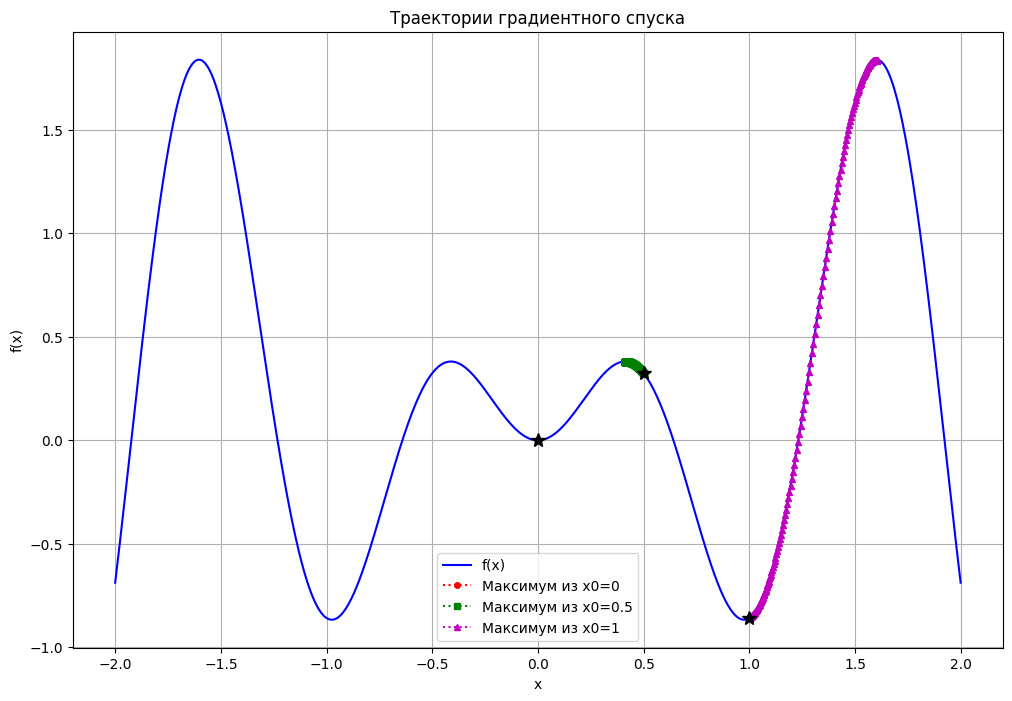

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectories(f, x0_points):
    x = np.linspace(-2, 2, 1000)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'b-', label='f(x)')

    colors = ['r', 'g', 'm']
    markers = ['o', 's', '^']

    for i, x0 in enumerate(x0_points):

        x_min, f_min, x_max, f_max, path_min, path_max = find_points(f, df, x0, eta=0.001)


        plt.plot(path_max, f(path_max),
                color=colors[i],
                linestyle=':',
                marker=markers[i],
                markersize=4,
                label=f'Максимум из x0={x0}')

        plt.plot(x0, f(x0), 'k*', markersize=10)

    plt.grid(True)
    plt.legend()
    plt.title('Траектории градиентного спуска')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

x0_points = [0, 0.5, 1]
plot_trajectories(f, x0_points)

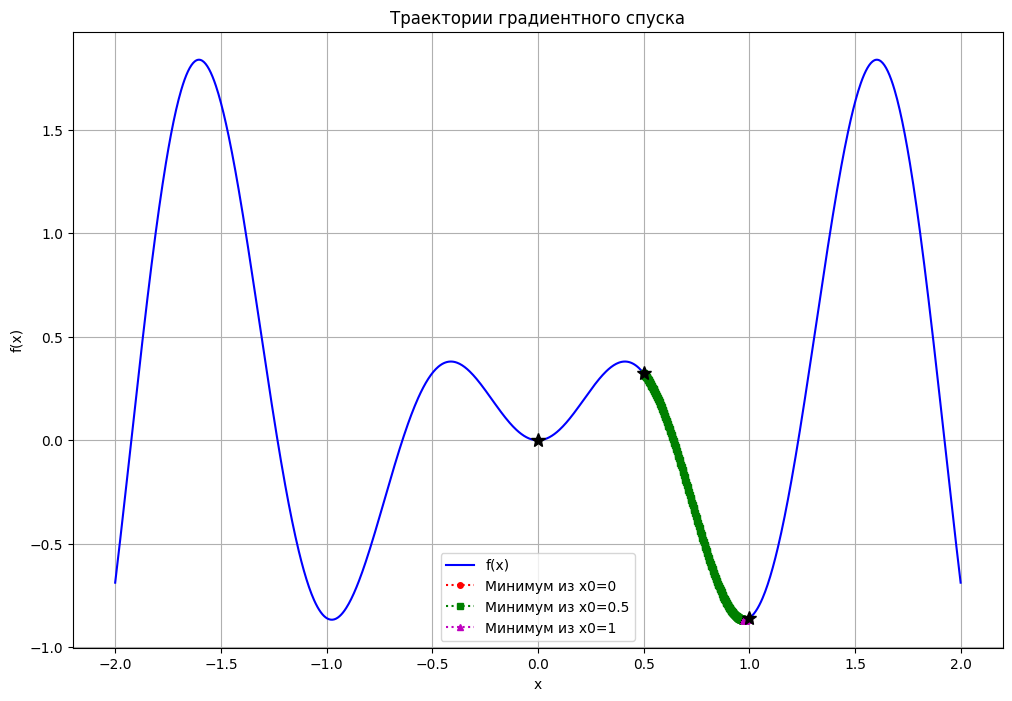

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectories(f, x0_points):
    x = np.linspace(-2, 2, 1000)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'b-', label='f(x)')

    colors = ['r', 'g', 'm']
    markers = ['o', 's', '^']

    for i, x0 in enumerate(x0_points):

        x_min, f_min, x_max, f_max, path_min, path_max = find_points(f, df, x0, eta=0.001)


        plt.plot(path_min, f(path_min),
                color=colors[i],
                linestyle=':',
                marker=markers[i],
                markersize=4,
                label=f'Минимум из x0={x0}')

        plt.plot(x0, f(x0), 'k*', markersize=10)

    plt.grid(True)
    plt.legend()
    plt.title('Траектории градиентного спуска')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

x0_points = [0, 0.5, 1]
plot_trajectories(f, x0_points)

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

$$w = (X^TX)^{-1}X^Ty$$

In [12]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [13]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [26]:
from random import randrange

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = randrange(m)

        X_j = X[idx:idx+1]
        y_j = y[idx:idx+1]

        params = params - 2 * learning_rate * (X_j.T @ ((X_j @ params) - y_j))

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [15]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [16]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [24]:
import time
from sklearn.metrics import r2_score

def compare_methods(X, y):
    results = {}


    start_time = time.time()
    exact_params = ols_solution(X, y)
    exact_time = time.time() - start_time
    X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X))
    exact_mse = r2_score(y, X_with_ones @ exact_params)

    start_time = time.time()
    gd_cost, gd_params = gradient_descent(X, y, learning_rate=0.01, iterations=10000)
    gd_time = time.time() - start_time
    gd_mse = r2_score(y, X_with_ones @ gd_params)

    start_time = time.time()
    sgd_cost, sgd_params = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000)
    sgd_time = time.time() - start_time
    sgd_mse = r2_score(y, X_with_ones @ sgd_params)

    results = {
        'Точная формула': {'r2': exact_mse, 'Время': exact_time},
        'Градиентный спуск': {'r2': gd_mse, 'Время': gd_time, 'История ошибок': gd_cost},
        'Стохастический град. спуск': {'r2': sgd_mse, 'Время': sgd_time, 'История ошибок': sgd_cost}
    }

    return results

results = compare_methods(X.values, y)

for method, metrics in results.items():
    print(f"\n{method}:")
    print(f"r2: {metrics['r2']:.6f}")
    print(f"Время выполнения: {metrics['Время']:.3f} сек")


Точная формула:
r2: 0.750821
Время выполнения: 0.015 сек

Градиентный спуск:
r2: 0.755463
Время выполнения: 20.759 сек

Стохастический град. спуск:
r2: 0.727614
Время выполнения: 9.592 сек


1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

Ответ: да, все методы справились, стахат спуск хуже, но тоже судя по R2 - достаточно неплохо

2)сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

Ответ:

Точная формула - 0.015 сек

Стохастический град. спуск - 9.592 сек

Градиентный спуск - 20.759 сек

Теория подтвердилась, действительно стахастический спуск быстрее полного, а точная формула самая точная

3)

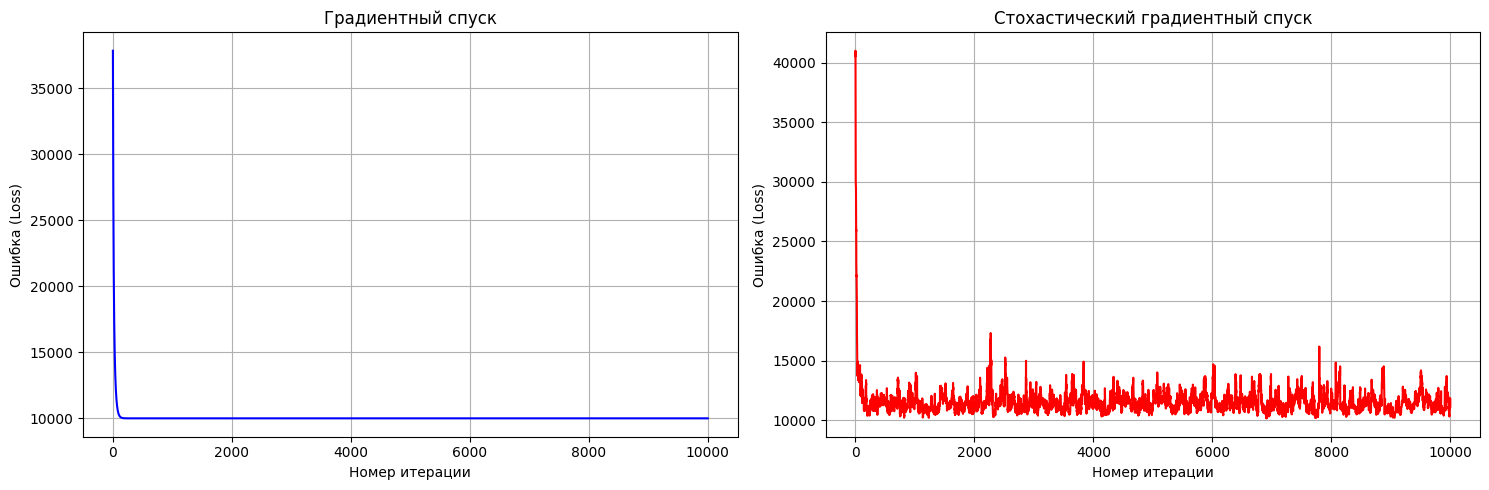

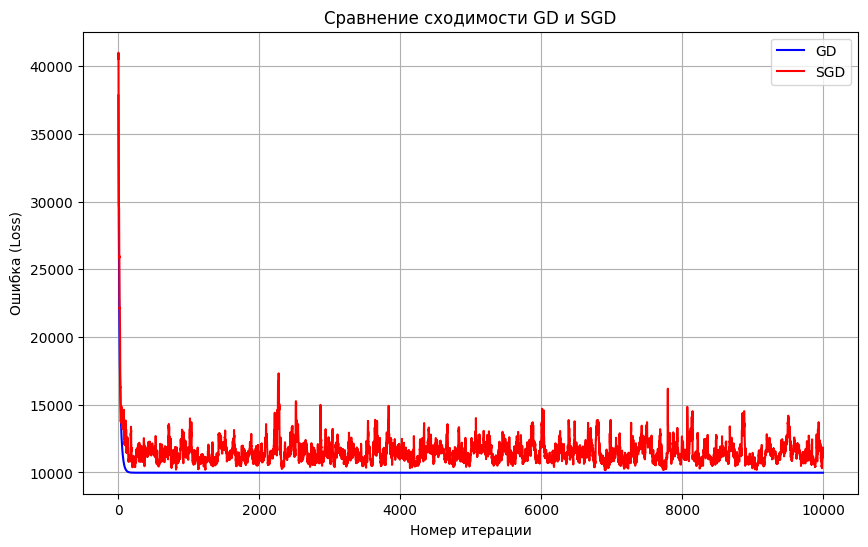

In [25]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(results['Градиентный спуск']['История ошибок'], 'b-')
ax1.set_title('Градиентный спуск')
ax1.set_xlabel('Номер итерации')
ax1.set_ylabel('Ошибка (Loss)')
ax1.grid(True)

ax2.plot(results['Стохастический град. спуск']['История ошибок'], 'r-')
ax2.set_title('Стохастический градиентный спуск')
ax2.set_xlabel('Номер итерации')
ax2.set_ylabel('Ошибка (Loss)')
ax2.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results['Градиентный спуск']['История ошибок'], 'b-', label='GD')
plt.plot(results['Стохастический град. спуск']['История ошибок'], 'r-', label='SGD')
plt.title('Сравнение сходимости GD и SGD')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (Loss)')
plt.legend()
plt.grid(True)
plt.show()

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

Градиентный спуск: r2: 0.755463

незначительный отрыв от

Точная формула: r2: 0.750821

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [27]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, lambda_reg=0.0):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        idx = randrange(m)

        X_j = X[idx:idx+1]
        y_j = y[idx:idx+1]

        gradient = 2 * (X_j.T @ ((X_j @ params) - y_j))
        gradient[1:] += 2 * lambda_reg * params[1:]

        params = params - learning_rate * gradient

        cost_track[i] = compute_cost(X, y, params, lambda_reg)

    return cost_track, params

def compute_cost(X, y, theta, lambda_reg=0.0):

    m = len(y)

    prediction_error = np.linalg.norm(X @ theta - y) ** 2

    regularization = lambda_reg * np.sum(theta[1:] ** 2)

    cost = (1./m) * prediction_error + regularization
    return cost

Lambda = 0.1, R2 = 0.734238
Lambda = 0.2, R2 = 0.705893
Lambda = 0.3, R2 = 0.728711
Lambda = 0.4, R2 = 0.681271
Lambda = 0.5, R2 = 0.671777
Lambda = 0.6, R2 = 0.631996
Lambda = 0.7, R2 = 0.657698
Lambda = 0.8, R2 = 0.615544
Lambda = 0.9, R2 = 0.599825
Lambda = 1.0, R2 = 0.572000

Лучший результат:
Lambda = 0.1, R2 = 0.734238


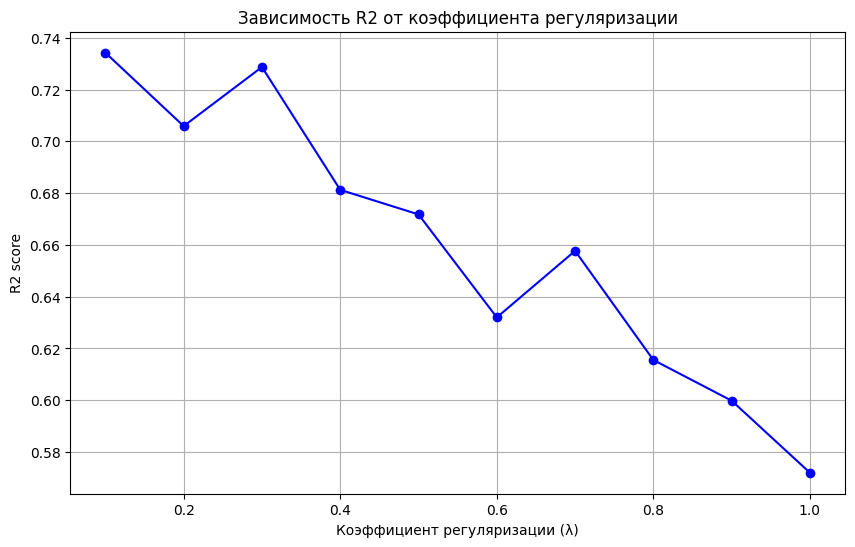

In [28]:
import numpy as np
from sklearn.metrics import r2_score

lambda_values = np.arange(0.1, 1.1, 0.1)
best_r2 = -np.inf
best_lambda = None
results = {}

for lambda_reg in lambda_values:
    cost_track, params = stochastic_gradient_descent(
        X.values, y,
        learning_rate=0.01,
        iterations=10000,
        lambda_reg=lambda_reg
    )

    X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X.values))
    y_pred = X_with_ones @ params

    r2 = r2_score(y, y_pred)
    results[lambda_reg] = r2

    if r2 > best_r2:
        best_r2 = r2
        best_lambda = lambda_reg

    print(f"Lambda = {lambda_reg:.1f}, R2 = {r2:.6f}")

print(f"\nЛучший результат:")
print(f"Lambda = {best_lambda:.1f}, R2 = {best_r2:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), 'bo-')
plt.xlabel('Коэффициент регуляризации (λ)')
plt.ylabel('R2 score')
plt.title('Зависимость R2 от коэффициента регуляризации')
plt.grid(True)
plt.show()

лучшее - 0.1
Означает, что данные хорошо структурированы

Модели не требуется сильная регуляризация

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

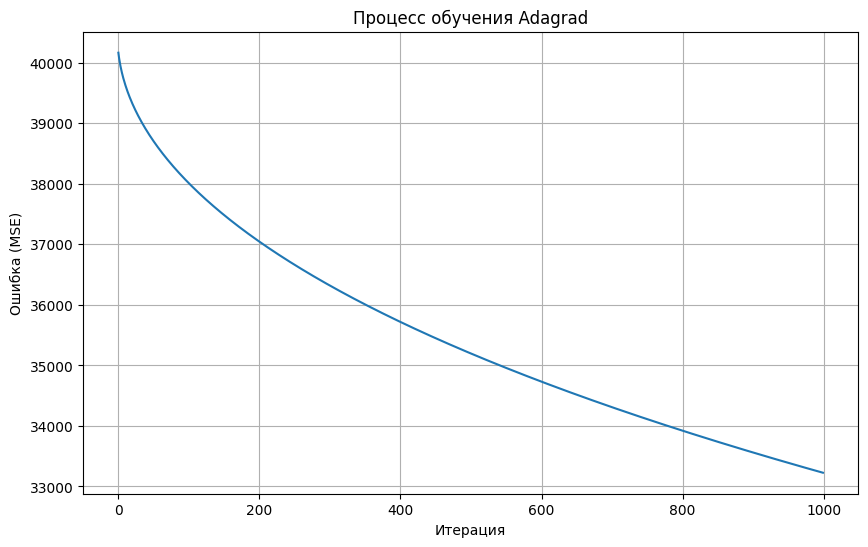

R2 = 0.186128


In [32]:
def modified_grad_descent(X, y, learning_rate=0.01, iterations=1000, epsilon=1e-8):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    G = np.zeros_like(params)
    cost_history = np.zeros(iterations)
    m = len(y)

    for i in range(iterations):
        gradient = (2/m) * X.T @ (X @ params - y)
        G += gradient ** 2
        params = params - (learning_rate / (np.sqrt(G + epsilon))) * gradient
        cost_history[i] = (1/m) * np.sum((X @ params - y) ** 2)

    return cost_history, params


cost_history, params = modified_grad_descent(
    X.values,
    y,
    learning_rate=0.1,
    iterations=1000,
    epsilon=1e-8
)



plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Процесс обучения Adagrad')
plt.xlabel('Итерация')
plt.ylabel('Ошибка (MSE)')
plt.grid(True)
plt.show()

X_n = np.hstack((np.ones((X.shape[0], 1)), X))
y_pred = X_n @ params


print(f"R2 = {r2_score(y, y_pred):.6f}")

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Вычислительная сложность, Проблемы с памятью, Неустойчивость, Стохастичность

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

  @janinaal